In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

In [57]:
df = pd.read_csv('Online_Retail.csv', encoding = 'latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


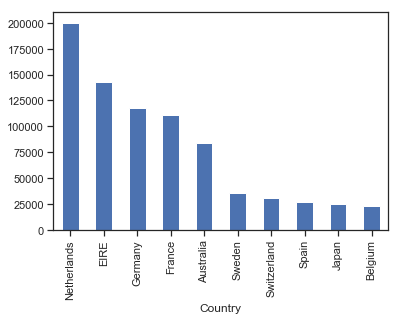

In [15]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)[1:11].plot.bar()

In [17]:
df.Quantity = df[df.Quantity > 0]

In [58]:
df.dropna(subset=['Quantity'], inplace=True)
df['Quantity'] = df['Quantity'].astype(int)

In [59]:
df.groupby(['CustomerID','Country']).sum().head()

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,0,2.08
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


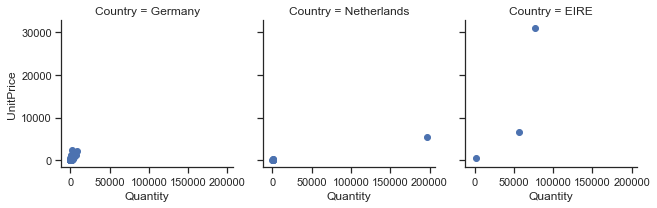

In [60]:
customers = df.groupby(['CustomerID','Country']).sum()
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)
top_countries =  ['Netherlands', 'EIRE', 'Germany']
customers = customers[customers['Country'].isin(top_countries)]
g = sns.FacetGrid(customers, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
g.add_legend()

In [61]:
df['Revenue'] = df.Quantity * df.UnitPrice

In [68]:
top3 = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)[1:4].index.tolist()
top3

['Netherlands', 'EIRE', 'Germany']

In [71]:
buckets = np.arange(0,50,1)

revenue_per_price = df.groupby(pd.cut(df.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.089068e+06
(1, 2]    2.557511e+06
(2, 3]    1.803382e+06
(3, 4]    8.499193e+05
(4, 5]    1.199347e+06
Name: Revenue, dtype: float64

Text(0, 0.5, 'Revenue')

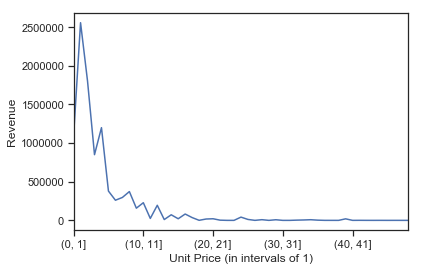

In [73]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(1)+')')
plt.ylabel('Revenue')

([<matplotlib.axis.YTick at 0xb409e50>,
 <a list of 6 Text yticklabel objects>)

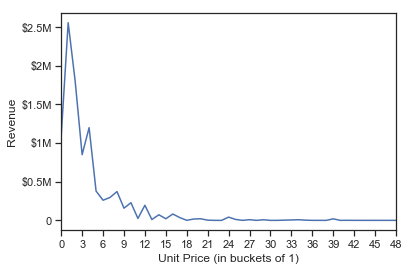

In [75]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in buckets of '+str(1)+')') 
plt.ylabel('Revenue')
plt.xticks(np.arange(0,50,3),
           np.arange(0,50,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])